In [107]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [77]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\Oliver\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font_scale=2, color_codes=True, rc=None)
sns.set(font=prop.get_name())
# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# set dark background
plt.style.use("dark_background")

In [14]:
df = pd.read_csv('C:/Users/Oliver/Desktop/Anticipate-Energy-Needs/buildings_cleaned.csv')

In [15]:
y = df['Electricity(kWh)']
X = df.drop(columns=['Electricity(kWh)'])

In [16]:
X

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),NaturalGas(therms),TotalGHGEmissions,ENERGYSTARScore
0,NonResidential,Hotel,1927,12,88434,1.0,81.699997,7.226362e+06,12764.529300,249.98,60.000
1,NonResidential,Hotel,1996,11,103566,1.0,94.800003,8.387933e+06,51450.816410,295.86,61.000
2,NonResidential,Hotel,1926,10,61320,1.0,110.800003,6.794584e+06,18112.130860,286.43,56.000
3,NonResidential,Hotel,1980,18,175580,1.0,114.800003,1.417261e+07,88039.984380,505.01,75.000
4,Nonresidential COS,Other,1999,2,97288,1.0,136.100006,1.208662e+07,47151.816410,301.81,59.625
...,...,...,...,...,...,...,...,...,...,...,...
3336,Nonresidential COS,Office,1990,1,12294,1.0,69.099998,8.497457e+05,3254.750244,20.94,46.000
3337,Nonresidential COS,Other,2004,1,16000,1.0,59.400002,9.502762e+05,5537.299805,32.17,82.250
3338,Nonresidential COS,Other,1974,1,13157,1.0,438.200012,5.765898e+06,39737.390630,223.54,78.750
3339,Nonresidential COS,Mixed Use Property,1989,1,14101,1.0,51.000000,7.194712e+05,3706.010010,22.11,81.750


In [17]:
X = pd.get_dummies(X)

In [19]:
X['ENERGYSTARScore'] = np.log(X['ENERGYSTARScore'])

In [20]:
# Division des données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# Création de l'objet de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la MSE et R²
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Affichage des résultats
print('MSE:', mse_linear)
print('R²:', r2_linear)

MSE: 16033720842.907515
R²: 0.9958846923037138


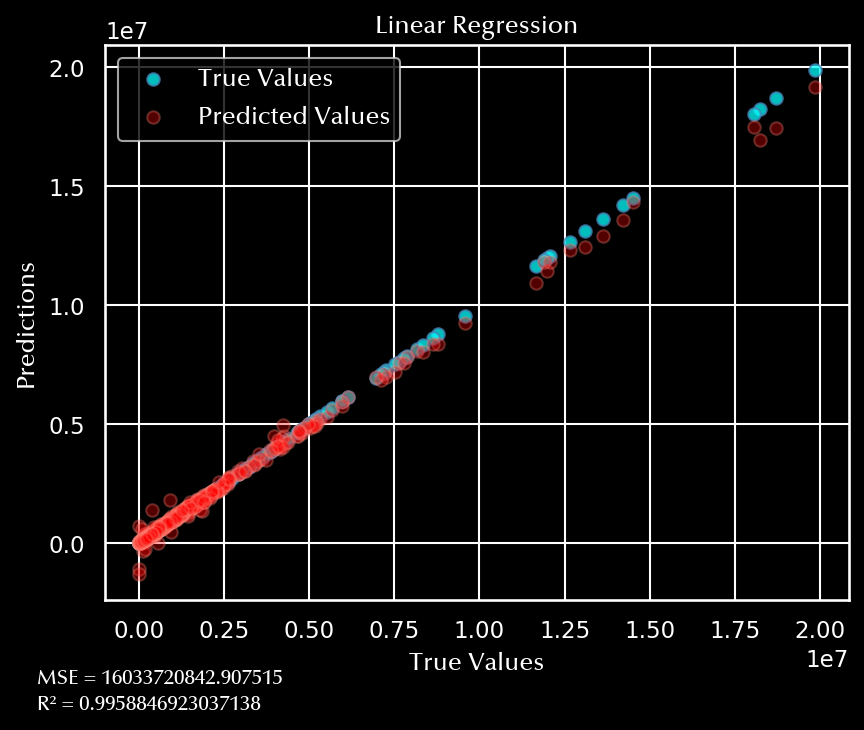

In [92]:
plt.scatter(y_test, y_test, color='cyan', label='True Values', alpha=0.75, edgecolor='steelblue', linewidth=1)
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', alpha=0.33, edgecolor='salmon', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Linear Regression', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_linear), fontproperties=prop, size=10)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_linear), fontproperties=prop, size=10)
plt.show()

In [94]:
#Regression Tree

# Initialisation du modèle de régression par arbre de décision
regressor = DecisionTreeRegressor(random_state=42)

# Entraînement du modèle sur le jeu d'entraînement
regressor.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = regressor.predict(X_test)

# Évaluation du modèle sur le jeu de test
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
print("Score R²: ", r2_tree)
print("MSE: ", mse_tree)

Score R²:  0.9052447679596958
MSE:  369177483450.43524


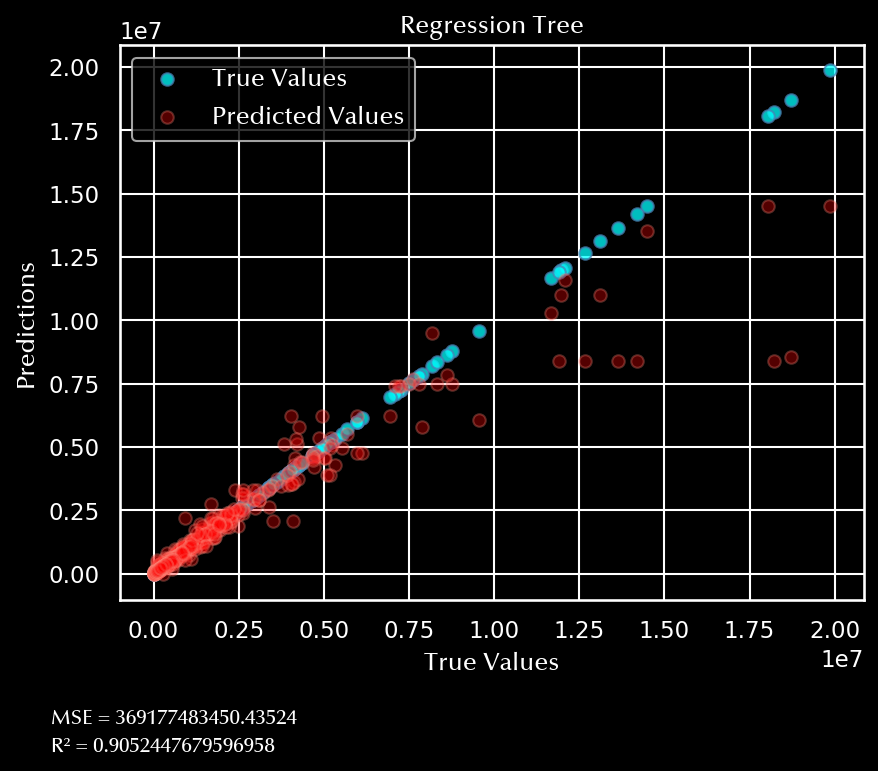

In [95]:
plt.scatter(y_test, y_test, color='cyan', label='True Values', alpha=0.75, edgecolor='steelblue', linewidth=1)
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', alpha=0.33, edgecolor='salmon', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Regression Tree', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_tree), fontproperties=prop, size=10)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_tree), fontproperties=prop, size=10)
plt.show()

In [88]:
mse > mse_tree

False

In [89]:
r2 > score

True

In [96]:
#Gradient Boosting

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Entraîner le modèle
gbr.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = gbr.predict(X_test)

# Calculer le score MSE et R2
mse_gradient = mean_squared_error(y_test, y_pred)
r2_gradient = r2_score(y_test, y_pred)
print("Score MSE: ", mse_gradient)
print("R²: ", r2_gradient)

Score MSE:  239152324123.25107
R²:  0.9386177787619079


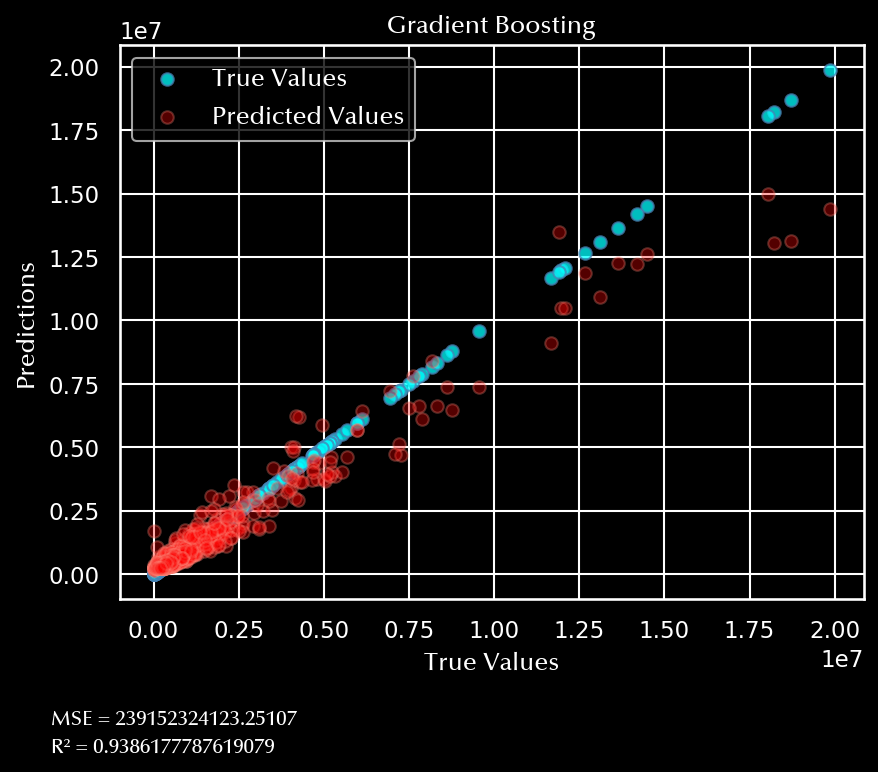

In [97]:
plt.scatter(y_test, y_test, color='cyan', label='True Values', alpha=0.75, edgecolor='steelblue', linewidth=1)
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', alpha=0.33, edgecolor='salmon', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Gradient Boosting', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_gradient), fontproperties=prop, size=10)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_gradient), fontproperties=prop, size=10)
plt.show()

In [99]:
mse_gradient > mse_linear

True

In [102]:
# Random Forest

# Instanciation et entraînement du modèle RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_random_forest = mean_squared_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)
print("MSE: %.2f" % mse_random_forest)
print("R²: %.2f" % r2_random_forest)

MSE: 172563896698.74
R²: 0.96


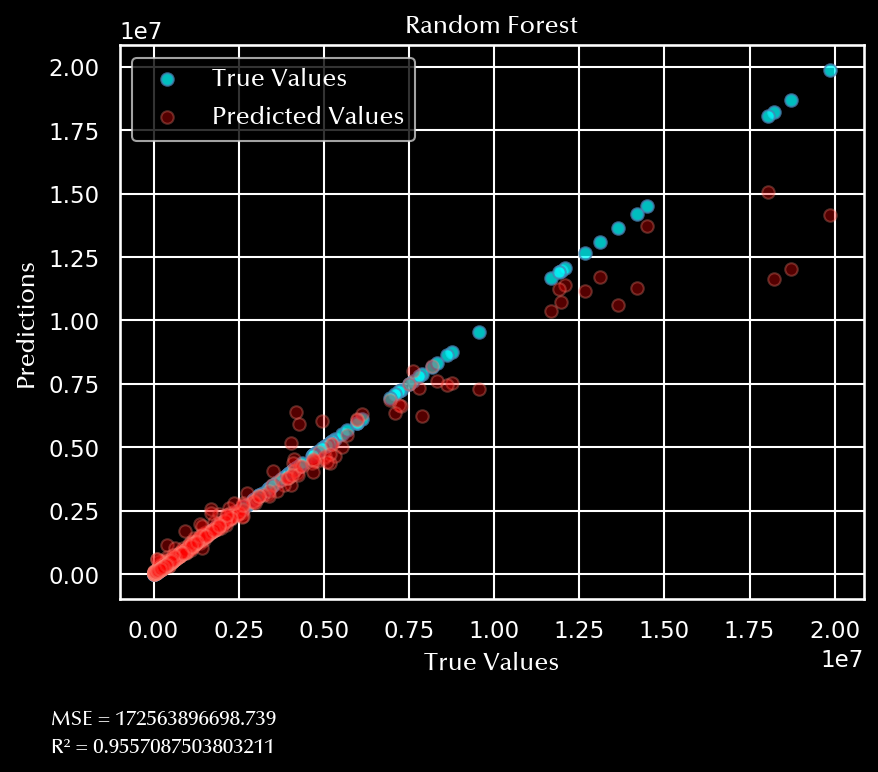

In [103]:
plt.scatter(y_test, y_test, color='cyan', label='True Values', alpha=0.75, edgecolor='steelblue', linewidth=1)
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', alpha=0.33, edgecolor='salmon', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Random Forest', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_random_forest), fontproperties=prop, size=10)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_random_forest), fontproperties=prop, size=10)
plt.show()

In [108]:
# Instanciation et entraînement du modèle XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = xgb.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_xgboost = mean_squared_error(y_test, y_pred)
r2_xgboost = r2_score(y_test, y_pred)
print("MSE: %.2f" % mse_xgboost)
print("R2: %.2f" % r2_xgboost)

MSE: 135908053134.84
R2: 0.97


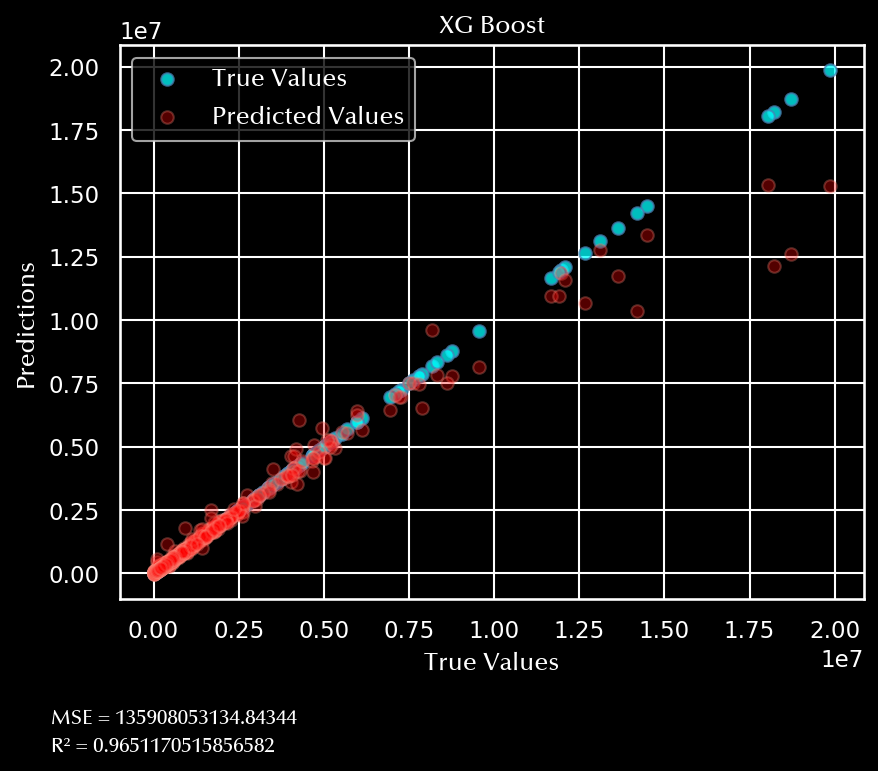

In [114]:
plt.scatter(y_test, y_test, color='cyan', label='True Values', alpha=0.75, edgecolor='steelblue', linewidth=1)
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', alpha=0.33, edgecolor='salmon', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('XG Boost', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_xgboost), fontproperties=prop, size=10)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_xgboost), fontproperties=prop, size=10)
plt.show()